In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('Ratings_prediction')
df

,Unnamed: 0,Ratings,Reviews
0,0,5,Awesome
1,1,4,Good choice
2,2,5,Terrific
3,3,3,Does the job
4,4,5,Super!
...,...,...,...
2095,2095,4,Pretty good
2096,2096,3,Good
2097,2097,3,Fair
2098,2098,5,Classy product


In [3]:
df.isnull().sum()

Unnamed: 0    0
Ratings       0
Reviews       0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,Ratings
count,2100.000000,2100.000000
mean,1049.500000,4.200000
std,606.362103,0.871987
min,0.000000,3.000000
25%,524.750000,3.000000
50%,1049.500000,4.500000
75%,1574.250000,5.000000
max,2099.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2100 non-null   int64 
 1   Ratings     2100 non-null   int64 
 2   Reviews     2100 non-null   object
dtypes: int64(2), object(1)
memory usage: 49.3+ KB


<AxesSubplot:xlabel='Ratings', ylabel='count'>

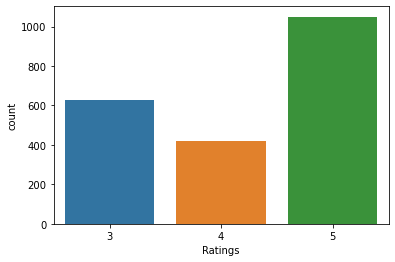

In [6]:
#checking distribution of rating
sns.countplot('Ratings',data=df)

In [7]:
#checking length of document
df["original_len"] = df["Reviews"].str.len() 

In [8]:
#convert text to lowercase
df['Reviews']=df['Reviews'].str.lower()

In [9]:
columns= ['Reviews']
for i in columns:
    #replace email address with email
    df[i]=df[i].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')
    
    #Replacing URLs with webaddress
    df[i]=df[i].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')
    
    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    df[i] = df[i].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[i] = df[i].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    df[i] = df[i].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[i] = df[i].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[i] = df[i].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[i] = df[i].str.replace(r'^\s+|\s+?$', '')
    

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.head()

,Ratings,Reviews,original_len
0,5,awesome,7
1,4,good choice,11
2,5,terrific,8
3,3,does the job,12
4,5,super,6


In [12]:
#remove stopwords
stopwords= set(stopwords.words('english')+['m','ur','aww','d','dont','cant','ja','u'])
df['Reviews']= df['Reviews'].apply(lambda x: ''.join(term for term in x.split() if term not in stopwords))

In [13]:
#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
lem= WordNetLemmatizer()
df['Reviews']= df['Reviews'].apply(lambda x: ''.join (lem.lemmatize(word) for word in x.split()))

In [14]:
df['clean_len']= df['Reviews'].str.len()

In [15]:
df.head()

,Ratings,Reviews,original_len,clean_len
0,5,awesome,7,7
1,4,goodchoice,11,10
2,5,terrific,8,8
3,3,job,12,3
4,5,super,6,5


In [16]:
print('original review length', df.original_len.sum())
print('clean review length', df.clean_len.sum())

original review length 18060
clean review length 14070


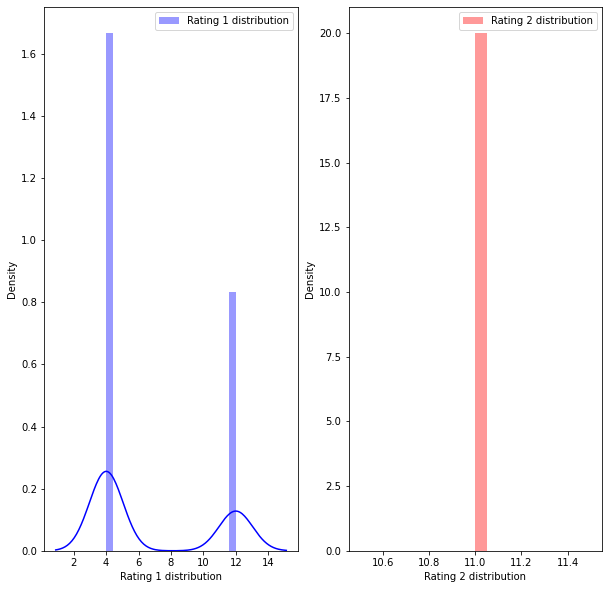

In [17]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==3]['original_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='b')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==4]['original_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='r')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()


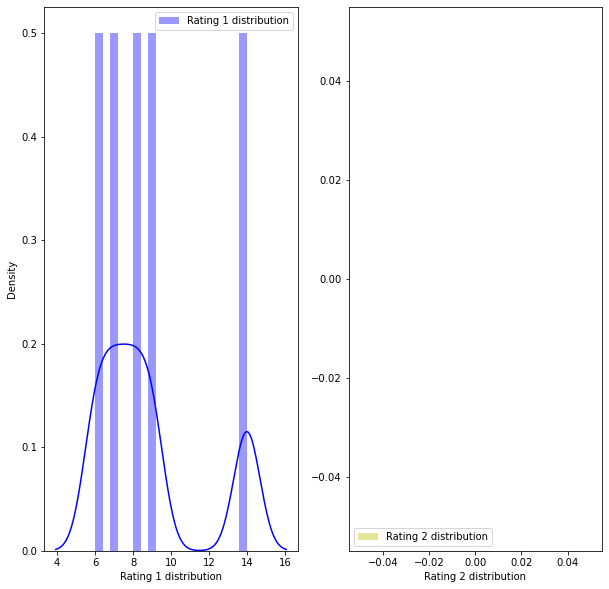

In [18]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==5]['original_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='b')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==1]['original_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

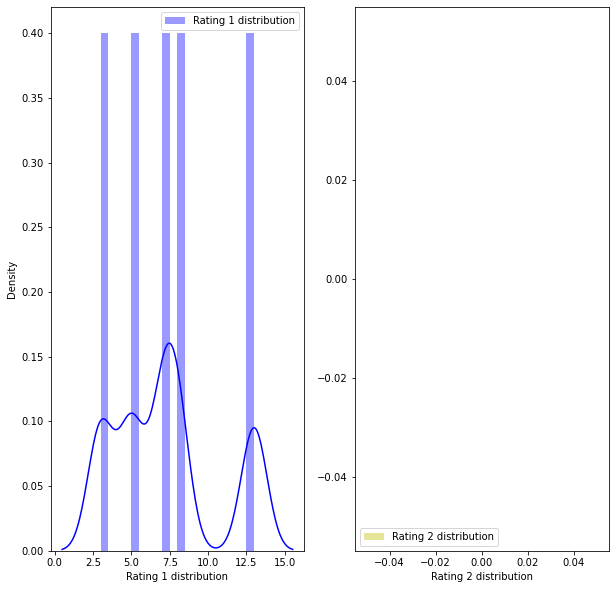

In [19]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==5]['clean_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='b')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==1]['clean_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

In [21]:
# 1. Convert text into vectors using TF-IDF
# 2. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Reviews'])

x = features
y = df['Ratings']

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [23]:
#handling imbalanced data through SMOTE technique
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x.y= sm.fit_resample(x,y)

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=55)

# Logistic Regression

In [25]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

1.0
[[114   0   0]
 [  0  88   0]
 [  0   0 218]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       114
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00       218

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



# Support Vector Classifier

In [26]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

1.0
[[114   0   0]
 [  0  88   0]
 [  0   0 218]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       114
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00       218

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



# KNeighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc= knc.predict(x_test)
print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test, predknc))

1.0
[[114   0   0]
 [  0  88   0]
 [  0   0 218]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       114
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00       218

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

1.0
[[114   0   0]
 [  0  88   0]
 [  0   0 218]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       114
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00       218

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



# Hyper Parameter Tunning

In [30]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [31]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

1.0

# Saving the model in pickle format

In [33]:
import pickle
filename='Ratings prediction.pkl'
pickle.dump(rfc,open(filename,"wb"))

# Conclusion

In [34]:
model=pickle.load(open('Ratings prediction.pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

1.0


In [35]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
Predicted,5,3,5,4,3,4,5,4,4,3,...,3,5,5,4,5,5,4,5,4,3
Original,5,3,5,4,3,4,5,4,4,3,...,3,5,5,4,5,5,4,5,4,3
